## Imports and Functions

In [ ]:
import numpy as np

Fluence=  (power of 3eV measured after generation) * (reflectivity of metallic mirrors at 400nm)^2 / (area*rep rate)

* reflectivity is ~99.4% for 400nm if I remember (squared because there are two)
* Area comes from camera data
* Power should be measured after the dichroic mirror
* rep rate = 250 kHz

the dichroic mirror after the 3 eV generation; immediatly after the telescope lens

Sydney (before expt): the 3.1 eV is giving me ~8 uJ/cm^2 incident, which can be increased by changing the pump diameter

Beam Spot Sizes:
* 6eV spot: 12 by 11
* 3eV spot: 80 by 280

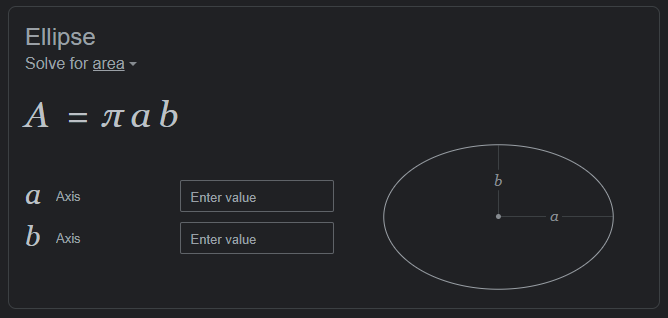

In [ ]:
def beam_area(fwhm_1, fwhm_2):  # fwhm in um
    beam_1e = fwhm_1/np.sqrt(2*np.log(2))  # convert fwhm to 1/e value (beam radius)
    beam_2e = fwhm_2/np.sqrt(2*np.log(2))
    return np.pi * ((beam_1e * 1e-6) * (beam_2e * 1e-6)) / 2  # in m

In [ ]:
def fluence_calc(power, reflect_400, area, rep_rate):
    fluence = power * reflect_400**2 / (area * rep_rate)
    return fluence * 1e6 / 100**2  # convert J to uJ and m^2 to cm^2

In [ ]:
reflect_400 = 0.9143  # 91.43% at 400 nm, squared because there are 2
# area_3eV = np.pi * ((80 * 1e-6) * (280 * 1e-6)) / 2  # in m
area_3eV = beam_area(80, 280)  # in m
power_pump = 10 / 1000  # 10 mW pump power
rep_rate = 250 * 1000  # 250 kHz

# # Check against Sydney's results
# area_3eV = np.pi * ((400 * 1e-6) * (400 * 1e-6)) / 2  # in m; Sydney's
# power_pump = 4.6 / 1000  # 10 mW pump power

# area_6eV = np.pi * ((12/100) * (11/100)) / 2  # in cm
# power_probe = 35 / 1000  # 35 mW probe power (p-polarised for full experiment)


print(f'{np.round(fluence_calc(power_pump, reflect_400, area_3eV, rep_rate), 2)} uJ/cm^2')  # uJ/cm^2

## May 2023

In [ ]:
reflect_400 = 0.9143  # 91.43% at 400 nm, squared because there are 2

## May 9 measurment
# area_3eV = beam_area(37, 70)  # beginning of mesurements
# power_pump = 9 / 1000  # aiming for a fluence of ~ 100 uJ/cm^2
# area_3eV = beam_area(65, 124)  # after lamp measurements
# power_pump = 5.9 / 1000

## May 13 measurments
power_pump = 5 / 1000  # start with 3 mW for flunce of ~ 108 uJ/cm^2
area_3eV = beam_area(68, 120)

rep_rate = 250 * 1000  # 250 kHz

print(f'Pump Fluence: {np.round(fluence_calc(power_pump, reflect_400, area_3eV, rep_rate), 2)} uJ/cm^2')  # uJ/cm^2

In [ ]:
reflect_400 = 0.9143  # 91.43% at 400 nm, squared because there are 2
# area_6eV = beam_area(20, 12)
# power = (35/1000) / 1000  # 35 uW probe power
# power = (50/1000) / 1000  # 50 uW probe power

## May 13
area_6eV = beam_area(20, 10)  # beginning
power = (25/1000) / 1000  # 5 to 25 uW probe power

rep_rate = 250 * 1000  # 250 kHz

print(f'Probe Fluence: {np.round(fluence_calc(power, reflect_400, area_6eV, rep_rate), 2)} uJ/cm^2')  # uJ/cm^2

## February 2023

In [ ]:
# def beam_area(fwhm_1, fwhm_2):  # fwhm in um
#     beam_1e = fwhm_1/np.sqrt(2*np.log(2))  # convert fwhm to 1/e value (beam radius)
#     beam_2e = fwhm_2/np.sqrt(2*np.log(2))
#     return np.pi * ((beam_1e * 1e-6) * (beam_2e * 1e-6)) / 2  # in m

In [ ]:
reflect_400 = 0.9143  # 91.43% at 400 nm, squared because there are 2
area_3eV = beam_area(44, 145)  # before lamp measurements
power_pump = 6 / 1000  # 6 mW pump power; max pump power
area_3eV = beam_area(60, 70)  # after lamp measurements
power_pump = 5.9 / 1000  # 6 mW pump power; max pump power

rep_rate = 250 * 1000  # 250 kHz

print(f'Pump Fluence: {np.round(fluence_calc(power_pump, reflect_400, area_3eV, rep_rate), 2)} uJ/cm^2')  # uJ/cm^2

To find time resolution: use fwhm 0.076 mm. * 2 / c

In [ ]:
from scipy.constants import c

In [ ]:
def time_res(fwhm):  # in um
    return fwhm * 1e-6 * 2 / c

In [ ]:
fwhm = 76  # um

print(f'{np.round(time_res(fwhm), 15)} seconds')  # e-12 is pico, e-15 is femto

500 femtoseconds

In [ ]:
reflect_400 = 0.9143  # 91.43% at 400 nm, squared because there are 2
beam_area = beam_area(10, 8)
power = (40/1000) / 1000  # 40 uW probe power
rep_rate = 250 * 1000  # 250 kHz

print(f'Probe Fluence: {np.round(fluence_calc(power, reflect_400, beam_area, rep_rate), 2)} uJ/cm^2')  # uJ/cm^2

But the 6 eV is quite lossy, not calculated here. We probably are only seeing about 20% of this fluence at the actual sample.

# Find Approx. Fluence of XUV

In [ ]:
reflect_400 = 1  # conservative
area_pump = beam_area(100, 100)  # XUV
power_pump = 250 / 1000  # 250 mW pump power; 500 mW is our damage threshold
rep_rate = 60 * 1e6  # 60 MHz

print(f'{np.round(fluence_calc(power_pump, reflect_400, area_3eV, rep_rate), 2)} uJ/cm^2')  # uJ/cm^2

# MM to Picoseconds Delay

In [ ]:
time_zero = 37.96
# mm_val = 38.05
mm_val = 37.81

delay = ((mm_val - time_zero) * 1e-3 * 2) / (3e8) 
print(f'{np.round(delay * 1e12, 3)} ps')  # e-12 is pico, e-15 is femto

# ((mm_val - time_zero) * 1e-3 * 2) / c

In [ ]:
x=0, y=-0.63, z=205.5, theta=0, phi=0